In [413]:
pip install ordered_set


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Getting the libraries

In [565]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from ordered_set import OrderedSet

# Preprocessing the given data


In [566]:
# Opening the file in read mode and reading the data as a string
text_file = open("test_data.txt","r")
data = text_file.read()

# Remove unnecessary characters and split the string on '\n'
data = data.replace('{', '').replace('}', '').replace(',', '').split('\n')

# Convert each string to a list of integers
rectangles = [list(map(int, item.split())) for item in data]
rectangles

[[1, 4, 13, 7, 16],
 [2, 10, 13, 13, 16],
 [3, 3, 11, 13, 18],
 [4, 6, 7, 11, 12],
 [5, 7, 8, 9, 10],
 [6, 11, 8, 15, 10],
 [7, 13, 10, 19, 18],
 [8, 16, 14, 19, 17],
 [9, 10, 15, 11, 18],
 [10, 3, 5, 7, 9]]

Here, the rectangles is in the form [rectangle_id, left_bottom_corner_x_coordinate, left_bottom_corner_y_coordinate, right_top_corner_x_coordinate, right_top_corner_y_coordinate]

# Plotting the given rectangles

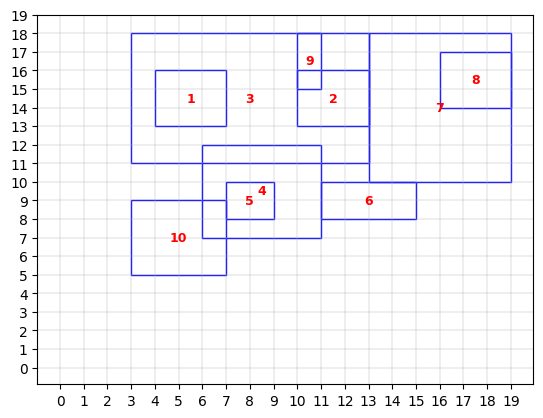

In [571]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot each rectangle
for i,rect in enumerate(rectangles):
    rect_id, x1, y1, x2, y2 = rect
    width = x2 - x1
    height = y2 - y1

    #Plot a line before plotting a rectangle with 0 thickness.
    ax.plot([0, 10],[0, 10], lw=0) 
    # Plot the rectangle
    rect_plot = plt.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='b', facecolor='none')
    ax.add_patch(rect_plot)

    # Annotate with the rectangle number
    plt.annotate(f'{rect_id}', (x1 + width/2, y1 + height/2), color='r', weight='bold',
                 fontsize=9, ha='center', va='center')
plt.grid(True,linewidth=0.3)
plt.xticks(np.arange(0, 20, 1))  # Set x-axis ticks with 1-unit spacing
plt.yticks(np.arange(0, 20, 1))  # Set y-axis ticks with 1-unit spacing
plt.show()

## Function to find all the rectangles enclosing the given point (x,y)

In [575]:
def point_finding(x,y):
    #creating an empty set
    encl_id = OrderedSet()
    for i,rect in enumerate(rectangles):
        rect_id, x1, y1, x2, y2 = rect
        #comparing the coordinates
        if x>x1 and x<x2 and y>y1 and y<y2:
            encl_id.add(rect_id)
    return encl_id

In the above function, it is assumed that if the point lies on the edge of a rectangle then that rectangle is not considered as an enclosing rectangle.

In [576]:
#Example
x = 10.2
y = 15.2
x = point_finding(x,y)
x

OrderedSet([2, 3, 9])

## Function to give all the rectangles that overlap with any rectangle

In [593]:
def overlap():
    #creating an overlap list
    overlap_list = []
    for i,rect in enumerate(rectangles):
        rect_id, x1, y1, x2, y2 = rect
        width = x2 - x1
        height = y2 - y1
        #creating an empty OrderedSet, to maintain the order and to remove duplicate elements.
        temp = OrderedSet()  
        #adding the id of the rectangle whose overlapping rectangles are to be found
        temp.add(rect_id)
        #checking for the rectangles that enclose the lower left corner of the given rectangle.
        temp = temp.union(point_finding(x1, y1))
        #checking for the rectangles that enclose the lower right corner of the given rectangle.
        temp = temp.union(point_finding(x1+width, y1))
        #checking for the rectangles that enclose the upper left corner of the given rectangle.
        temp = temp.union(point_finding(x1, y1+height))
        #checking for the rectangles that enclose the upper right corner of the given rectangle.
        temp = temp.union(point_finding(x2, y2))
        overlap_list.append(temp)
    print(overlap_list)
    print('\n')
    #below loop is to give all rectangles that overlap the given rectangle 
    #before loop and after loop results can be verified.
    for i in range(len(overlap_list)):
            for j in range(1, len(overlap_list[i])):
                index_to_update = overlap_list[i][j] - 1
                if 0 <= index_to_update < len(overlap_list):
                    overlap_list[index_to_update].update([overlap_list[i][0]])
    return overlap_list

Eg. OrderedSet([5, 7, 9, 12]), OrderedSet([6, 10, 12]) implies that rectangle 5 overlaps with rectangles 7, 9 and 12; rectangle 6 overlaps with rectangles 10 and 12.

In [594]:
overlap_list = overlap()
print(overlap_list)

[OrderedSet([1, 3]), OrderedSet([2, 3]), OrderedSet([3]), OrderedSet([4, 10, 3]), OrderedSet([5, 4]), OrderedSet([6]), OrderedSet([7]), OrderedSet([8, 7]), OrderedSet([9, 3, 2]), OrderedSet([10, 4])]


[OrderedSet([1, 3]), OrderedSet([2, 3, 9]), OrderedSet([3, 1, 2, 4, 9]), OrderedSet([4, 10, 3, 5]), OrderedSet([5, 4]), OrderedSet([6]), OrderedSet([7, 8]), OrderedSet([8, 7]), OrderedSet([9, 3, 2]), OrderedSet([10, 4])]


# Function to give all the rectangles that don't overlap with any rectangle.


In [589]:
def non_overlap():
    non_overlap_list = set()
    for i in range(len(overlap_list)):
        if(len(overlap_list[i])==1):
            non_overlap_list.add(overlap_list[i][0])
    return non_overlap_list

In [590]:
non_overlap_list = non_overlap()
print(non_overlap_list)

{6}


### Function(similar to point_finding) to check if the point (x,y) lies inside or on the edge of the rectangle with the given id idx

In [596]:
def point_check(x,y,idx):
    rec = rectangles[idx][0] 
    x1 = rectangles[idx][1]
    y1 = rectangles[idx][2]
    x2 = rectangles[idx][3]
    y2 = rectangles[idx][4]
    if x>=x1 and x<=x2 and y>=y1 and y<=y2:
        return True
    return False

## Function to find all the rectangles that is being contained by a rectangle

In [605]:
def rect_contained1():
    #creating a rect_contained list
    rect_contained_list = []
    #taking the overlap list from above result
    for i in range(len(overlap_list)):  
            temp = []
            temp.append(overlap_list[i][0])
            for j in range(1, len(overlap_list[i])):
                rect_id = overlap_list[i][j] - 1
                x1, y1, x2, y2 = rectangles[rect_id][1:5]
                width = x2 - x1
                height = y2 - y1
                # Checking if the overlap condition is met
                lbc = point_check2(x1, y1,i)
                rbc =  point_check2(x1 + width, y1,i)
                ltc = point_check2(x2, y1 + height,i)
                rtc = point_check2(x2, y2,i)
                
                
                if lbc and rbc and rtc and ltc:
                    temp.append(overlap_list[i][j]) 
            rect_contained_list.append(temp)

    return rect_contained_list


In [606]:
rect_contained_list = rect_contained1()
print(rect_contained_list)

[[1], [2], [3, 1, 2, 9], [4, 5], [5], [6], [7, 8], [8], [9], [10]]


## Function to find all the rectangles that is abutting a rectangle

In [607]:
def abutting():
    #creating an abutting list
    abutting = []
    for i,rect in enumerate(rectangles):
        rect_id, x1, y1, x2, y2 = rect
        height = y2 - y1
        width = x2 - x1
        height = y2 - y1
        width = x2 - x1
        for j,rect_nbr in enumerate(rectangles):
            if j!= i:
                rect_nbr_id, x1_nbr, y1_nbr, x2_nbr, y2_nbr = rect_nbr
                height_nbr = y2_nbr - y1_nbr
                width_nbr = x2_nbr - x1_nbr
                temp = []
                #applying the condition
                if x1_nbr == x2 and not(y1_nbr>y2 and y2_nbr>y2) and not(y2_nbr<y1 and y1_nbr<y1):
                    temp.extend([rect_id, "e", rect_nbr_id])
                if x2_nbr == x1 and not(y1_nbr>y2 and y2_nbr>y2) and not(y2_nbr<y1 and y1_nbr<y1):
                    temp.extend([rect_id, "w", rect_nbr_id])
                if y1_nbr == y2 and not(x1_nbr>x2 and x2_nbr>x2) and not(x2_nbr<x1 and x1_nbr<y1):
                    temp.extend([rect_id, "n", rect_nbr_id])
                if y2_nbr == y1 and not(x1_nbr>x2 and x2_nbr>x2) and not(x2_nbr<x1 and x1_nbr<x1):
                    temp.extend([rect_id, "s", rect_nbr_id])
                
                if temp:
                    abutting.append(temp)
    return abutting
                

Eg: [[5, n, 7], [4, e, 3]] implies that rectangle 5 has rectangle 7 abutting it on the northern side, rectangle 4 has rectangle 3 abutting it on the eastern side.

In [609]:
abutting_list = abutting()
print(abutting_list)

[[2, 'e', 7], [3, 'e', 7], [4, 'e', 6], [5, 'w', 10], [6, 'w', 4], [6, 'n', 7], [7, 'w', 2], [7, 'w', 3], [7, 's', 6], [10, 'e', 5]]
